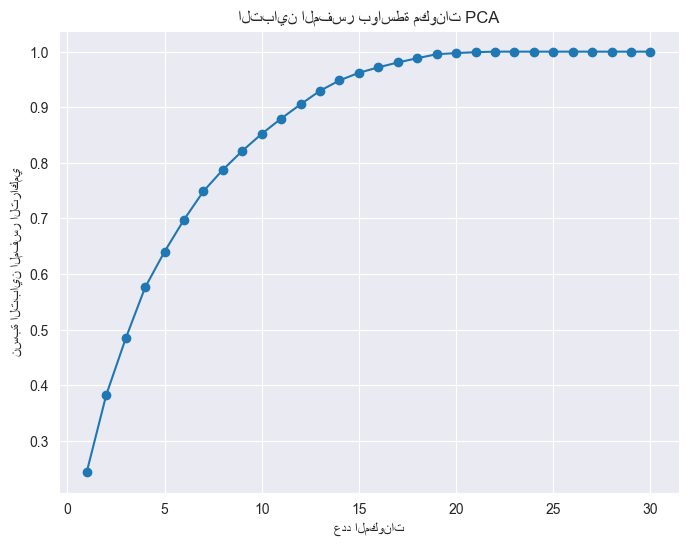

عدد المكونات المختارة للحفاظ على 95% من التباين: 15


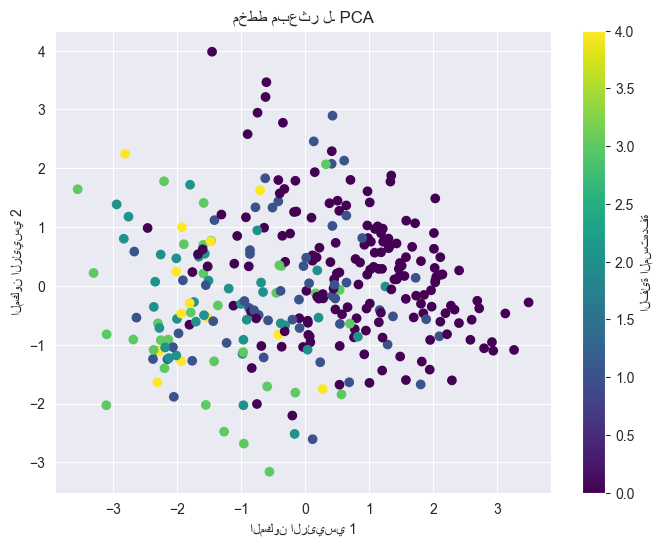

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

# التأكد من وجود المجلدات
os.makedirs('../results/evaluation', exist_ok=True)
os.makedirs('../data', exist_ok=True)

# تحميل البيانات المعالجة
data_processed = pd.read_csv('../data/processed_heart_disease.csv')

# تحميل عمود target من البيانات الأصلية
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data_original = pd.read_csv(url, names=columns)
data_original = data_original.replace('?', np.nan)
data_original['ca'] = data_original['ca'].astype(float)
data_original['thal'] = data_original['thal'].astype(float)
data_original = data_original.fillna(data_original.mean())
y = data_original['target']

# تحضير البيانات لـ PCA
X = data_processed.values

# تطبيق PCA الكامل لحساب التباين
pca = PCA()
X_pca = pca.fit_transform(X)

# حساب التباين المفسر
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# رسم التباين المفسر التراكمي
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('عدد المكونات')
plt.ylabel('نسبة التباين المفسر التراكمي')
plt.title('التباين المفسر بواسطة مكونات PCA')
plt.grid(True)
plt.savefig('../results/evaluation/pca_variance.png')
plt.show()

# اختيار عدد المكونات (95% من التباين)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'عدد المكونات المختارة للحفاظ على 95% من التباين: {n_components}')

# تطبيق PCA النهائي
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X)
pca_columns = [f'PC{i+1}' for i in range(n_components)]
X_pca_reduced = pd.DataFrame(X_pca_reduced, columns=pca_columns)

# حفظ البيانات المخفضة
X_pca_reduced.to_csv('../data/pca_heart_disease.csv', index=False)

# رسم مبعثر لأول مكونين رئيسيين
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_reduced['PC1'], X_pca_reduced['PC2'], c=y, cmap='viridis')
plt.colorbar(label='الفئة المستهدفة')
plt.xlabel('المكون الرئيسي 1')
plt.ylabel('المكون الرئيسي 2')
plt.title('مخطط مبعثر لـ PCA')
plt.savefig('../results/evaluation/pca_scatter.png')
plt.show()